# A Second Empirical Exploration of Machine Learning Concepts

## Linear regression predictors
Let define the class of affine function $$L_d = \{h_{w,b}: w\in\mathbb{R}^d, b\in\mathbb{R}\},$$
where $$h_{w,b}(x)=w\cdot x+b = \sum_{j=1}^d w_jx_j + b.$$
> ### Note that
> It may be more convenient to incorporate $b$, called the bias, into $w$ as an extra coordinate and add an extra   coordinate with a value of 1 to all $x \in {\cal X}$. Let $w'=(b,w_1,\ldots,w_d)\in \mathbb{R}^{d+1}$ and $x'=(1,x_1,\dots,x_d)\in\mathbb{R}^{d+1}$. We can write, $$h_{w,b}(x)=w\cdot x+b=w'\cdot x' .$$

The hypothesis class of *linear regression predictors* is the set of linear functions ${\cal H}_{lin}=L_d$. *Least squares* is the algorithm that solves the ERM problem for the hypothesis class of linear regression predictors with respect to the squared loss. The ERM problem with respect to this class, given a training set S is to find:
$$\textrm{argmin}_w L_S(h_w)=\textrm{argmin}_w \frac{1}{m}\sum_{i=1}^m(w'\cdot x_i' - y_i)^2$$

Some learning tasks call for nonlinear predictors, such as polynomial predictors. Take, for instance, a one dimensional polynomial function of degree $n$, that is, $$p(x)=a_0+a_1 x+a_2 x^2+\ldots +a_n x^n.$$ One way to learn this class is by reduction to the problem of linear regression. To translate a polynomial regression
problem to a linear regression problem, we define the mapping $\psi:\mathbb{R} \rightarrow \mathbb{R}^{n+1}$
such that $\psi(x) = (1, x, x^2, \ldots, x^n)$. Then we have that $$p(\psi(x)) = a_0 + a_1 x + a_2 x^2 + \ldots + a_n x^n = a\cdot\psi(x)$$ and we can find the optimal vector of coefficients $a$ by using the Least Squares algorithm. 

> ### Questions:
> 1. Use the [LinearRegression](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares) module from sklearn to learn a linear regression predictor for the `dataA` set.
> 1. Use the [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) and [pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) modules in sklearn to learn a polynomial predictor for the `dataA`. 
> 1. Compute and display the errors obtained for different values of $d$ for `dataA` sets and then for `dataB` sets. Try to understand how the datasets were generated (`unknown_ditrib.py`) to explain the results.
> 1. Find the best regressor to solve the task in (https://archive.ics.uci.edu/ml/datasets/Abalone)




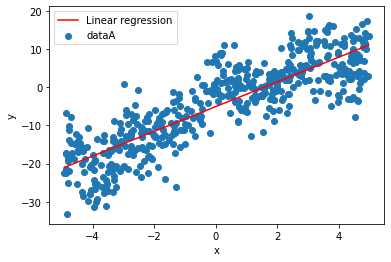

In [18]:
#Q1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

testA = pd.read_csv("./dataA_test.csv")
X = testA["x"].values[:,np.newaxis] # column matrix instead of line vector
y = testA["y"]
reg = linear_model.LinearRegression()
reg.fit(X,y)

xsupport = pd.DataFrame(np.linspace(min(testA.x),max(testA.x),500))
y_ = reg.predict(xsupport)

plt.scatter(testA["x"], testA["y"], label='dataA')
plt.plot(xsupport, y_, c='r',label='Linear regression')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

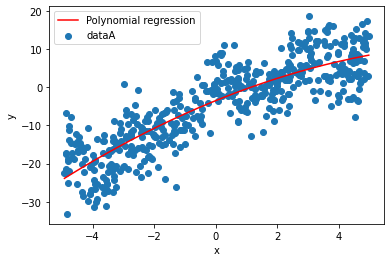

In [19]:
#Q2
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X, y)
y_plot = model.predict(xsupport)

plt.scatter(testA["x"], testA["y"], label='dataA')
plt.plot(xsupport, y_plot, c='r',label='Polynomial regression')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

<AxesSubplot:xlabel='d'>

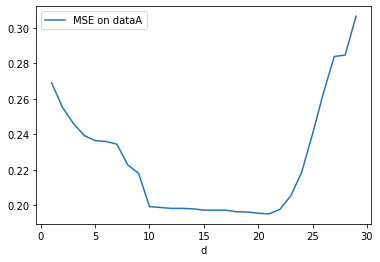

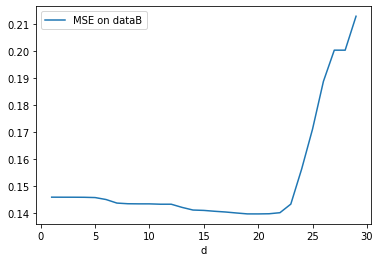

In [21]:
#Q3
from sklearn.metrics import explained_variance_score
def error_depending_on_d(dataset): 
    errors = []
    for d in range(1, 30):
        # Preprocess data
        test = pd.read_csv(dataset)
        X = test["x"].values[:,np.newaxis] # column matrix instead of line vector
        y = test["y"]
        #Train
        model = make_pipeline(PolynomialFeatures(d), LinearRegression())
        model.fit(X,y)
        #Make a prediction of the target using the model trained on the train set
        y_ = model.predict(X)
        #Error calculation
        errors.append([d, 1-explained_variance_score(y, y_)])#mean_squared_error(y, y_))
    return errors
#Error display
errors_A = error_depending_on_d("./dataA_test.csv")
errors_B = error_depending_on_d("./dataB_test.csv")
df_A = pd.DataFrame(errors_A,columns=['d','MSE on dataA'])
df_B = pd.DataFrame(errors_B,columns=['d','MSE on dataB'])
df_A.plot(x='d',y='MSE on dataA')
df_B.plot(x='d',y='MSE on dataB')

We can see the error reduces for degree 1 to 20 and it is minimized around degree 20 for both data sets.
And then it increases sharply beyond degree 20.

In [19]:
#Q4
test = pd.read_csv('abalone.data')
entries = test.iloc[:, 0:-1]
#Normalize 'Sex' row so that M=0, F=1, I=2
entries = entries.replace('M', 0)
entries = entries.replace('F', 1)
entries = entries.replace('I', 2)
#entries = entries.values[:,np.newaxis] # column matrix instead of line vector
y = test.iloc[:, -1]

errors = []
for d in range(1, 10):
    #Train
    model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    model.fit(entries,y)
    #Make a prediction of the target using the model trained on the train set
    y_ = model.predict(entries)
    errors.append([1-explained_variance_score(y, y_), d])#mean_squared_error(y, y_))
print(errors)
print(min(errors))

[[0.4641651043145628, 1], [0.4136404872694843, 2], [0.378914305173624, 3], [0.31886554482685836, 4], [0.21934386572226972, 5], [0.07546888616134662, 6], [0.0003654485986556155, 7], [8.492333436738164e-05, 8], [5.544416866631874e-05, 9]]
[5.544416866631874e-05, 9]


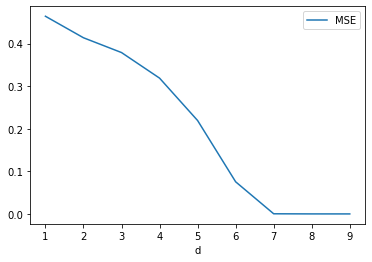

In [21]:
#Q4 part 2 (so I don't have to compute the 'errors' list every time (it took a very long time to compute))
df = pd.DataFrame(errors,columns=['MSE','d'])
df.plot(x='d',y='MSE')

I only computed the MSE for degree<10 because it takes too much time for my computer.
The curve looks similar to those in Q3 so we can predict that the MSE will be lowered for degree around 20.
But since higher the degree is, longer is the regressor's training, the most convinient degree would be degree 7 which has a MSE = 10^-4 .